In [1]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('train_1.csv')
test_df = pd.read_csv('test_1.csv')

# Display the first few rows of each dataset
print("Train DataFrame:")
print(train_df.head())
print("\nTest DataFrame:")
print(test_df.head())

# Check for missing values
print("\nMissing values in train_df:\n", train_df.isnull().sum())
print("\nMissing values in test_df:\n", test_df.isnull().sum())

# Check the structure of the datasets
print("\nInfo for train_df:")
train_df.info()

print("\nInfo for test_df:")
test_df.info()


Train DataFrame:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2  

In [2]:
# Dealing with missing values in train dataset
train_df['Gender'].fillna(train_df['Gender'].mode()[0], inplace=True)
train_df['Married'].fillna(train_df['Married'].mode()[0], inplace=True)
train_df['Dependents'].fillna(train_df['Dependents'].mode()[0], inplace=True)
train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0], inplace=True)
train_df['LoanAmount'].fillna(train_df['LoanAmount'].median(), inplace=True)
train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mode()[0], inplace=True)
train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0], inplace=True)

# Dealing with missing values in test dataset
test_df['Gender'].fillna(test_df['Gender'].mode()[0], inplace=True)
test_df['Dependents'].fillna(test_df['Dependents'].mode()[0], inplace=True)
test_df['Self_Employed'].fillna(test_df['Self_Employed'].mode()[0], inplace=True)
test_df['LoanAmount'].fillna(test_df['LoanAmount'].median(), inplace=True)
test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].mode()[0], inplace=True)
test_df['Credit_History'].fillna(test_df['Credit_History'].mode()[0], inplace=True)

# Checking if missing values are dealt with
print("Missing values in train_df after imputation:\n", train_df.isnull().sum())
print("Missing values in test_df after imputation:\n", test_df.isnull().sum())


Missing values in train_df after imputation:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Missing values in test_df after imputation:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [3]:
from sklearn.preprocessing import LabelEncoder

# Encoding categorical features in train dataset
for column in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    le = LabelEncoder()
    train_df[column] = le.fit_transform(train_df[column])

# Encoding categorical features in test dataset
for column in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']:
    le = LabelEncoder()
    test_df[column] = le.fit_transform(test_df[column])

# Display the first few rows after encoding
print(train_df.head())
print(test_df.head())


    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001002       1        0           0          0              0   
1  LP001003       1        1           1          0              0   
2  LP001005       1        1           0          0              1   
3  LP001006       1        1           0          1              0   
4  LP001008       1        0           0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Property_Area  Loan_Status  
0             1.0              2            1  
1             1.0              0            0  
2       

In [4]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

X = train_df.drop(['Loan_ID', 'Loan_Status'], axis=1)
Y = train_df['Loan_Status']

print("Original class distribution:", Counter(Y))

# Oversample the minority class
ros = RandomOverSampler(random_state=0)
X, Y = ros.fit_resample(X, Y)

print("Class distribution after oversampling:", Counter(Y))


Original class distribution: Counter({1: 422, 0: 192})
Class distribution after oversampling: Counter({1: 422, 0: 422})


[0.02421363 0.0221093  0.06648973 0.02576041 0.02706646 0.18712989
 0.12974006 0.18302675 0.05041279 0.22311389 0.06093708]


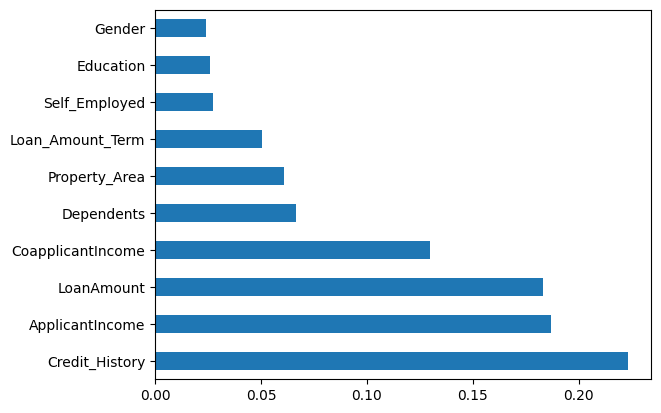

In [5]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show()


In [6]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, random_state=0, test_size=0.3)

logr = LogisticRegression()
logr.fit(X_train, y_train)

y_pred = logr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.49606299212598426


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
train_df = pd.read_csv('train_1.csv')

# Handle missing values
train_df['Gender'].fillna(train_df['Gender'].mode()[0], inplace=True)
train_df['Married'].fillna(train_df['Married'].mode()[0], inplace=True)
train_df['Dependents'].fillna(train_df['Dependents'].mode()[0], inplace=True)
train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0], inplace=True)
train_df['LoanAmount'].fillna(train_df['LoanAmount'].median(), inplace=True)
train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mode()[0], inplace=True)
train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0], inplace=True)

# Encode categorical variables
for column in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    le = LabelEncoder()
    train_df[column] = le.fit_transform(train_df[column])

# Prepare features and target variable
X = train_df.drop(['Loan_ID', 'Loan_Status'], axis=1)
Y = train_df['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1, test_size=0.3)

from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators=10)
gbm.fit(X_train, y_train)
y_pred_gbm = gbm.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gbm))


Gradient Boosting Accuracy: 0.7891891891891892


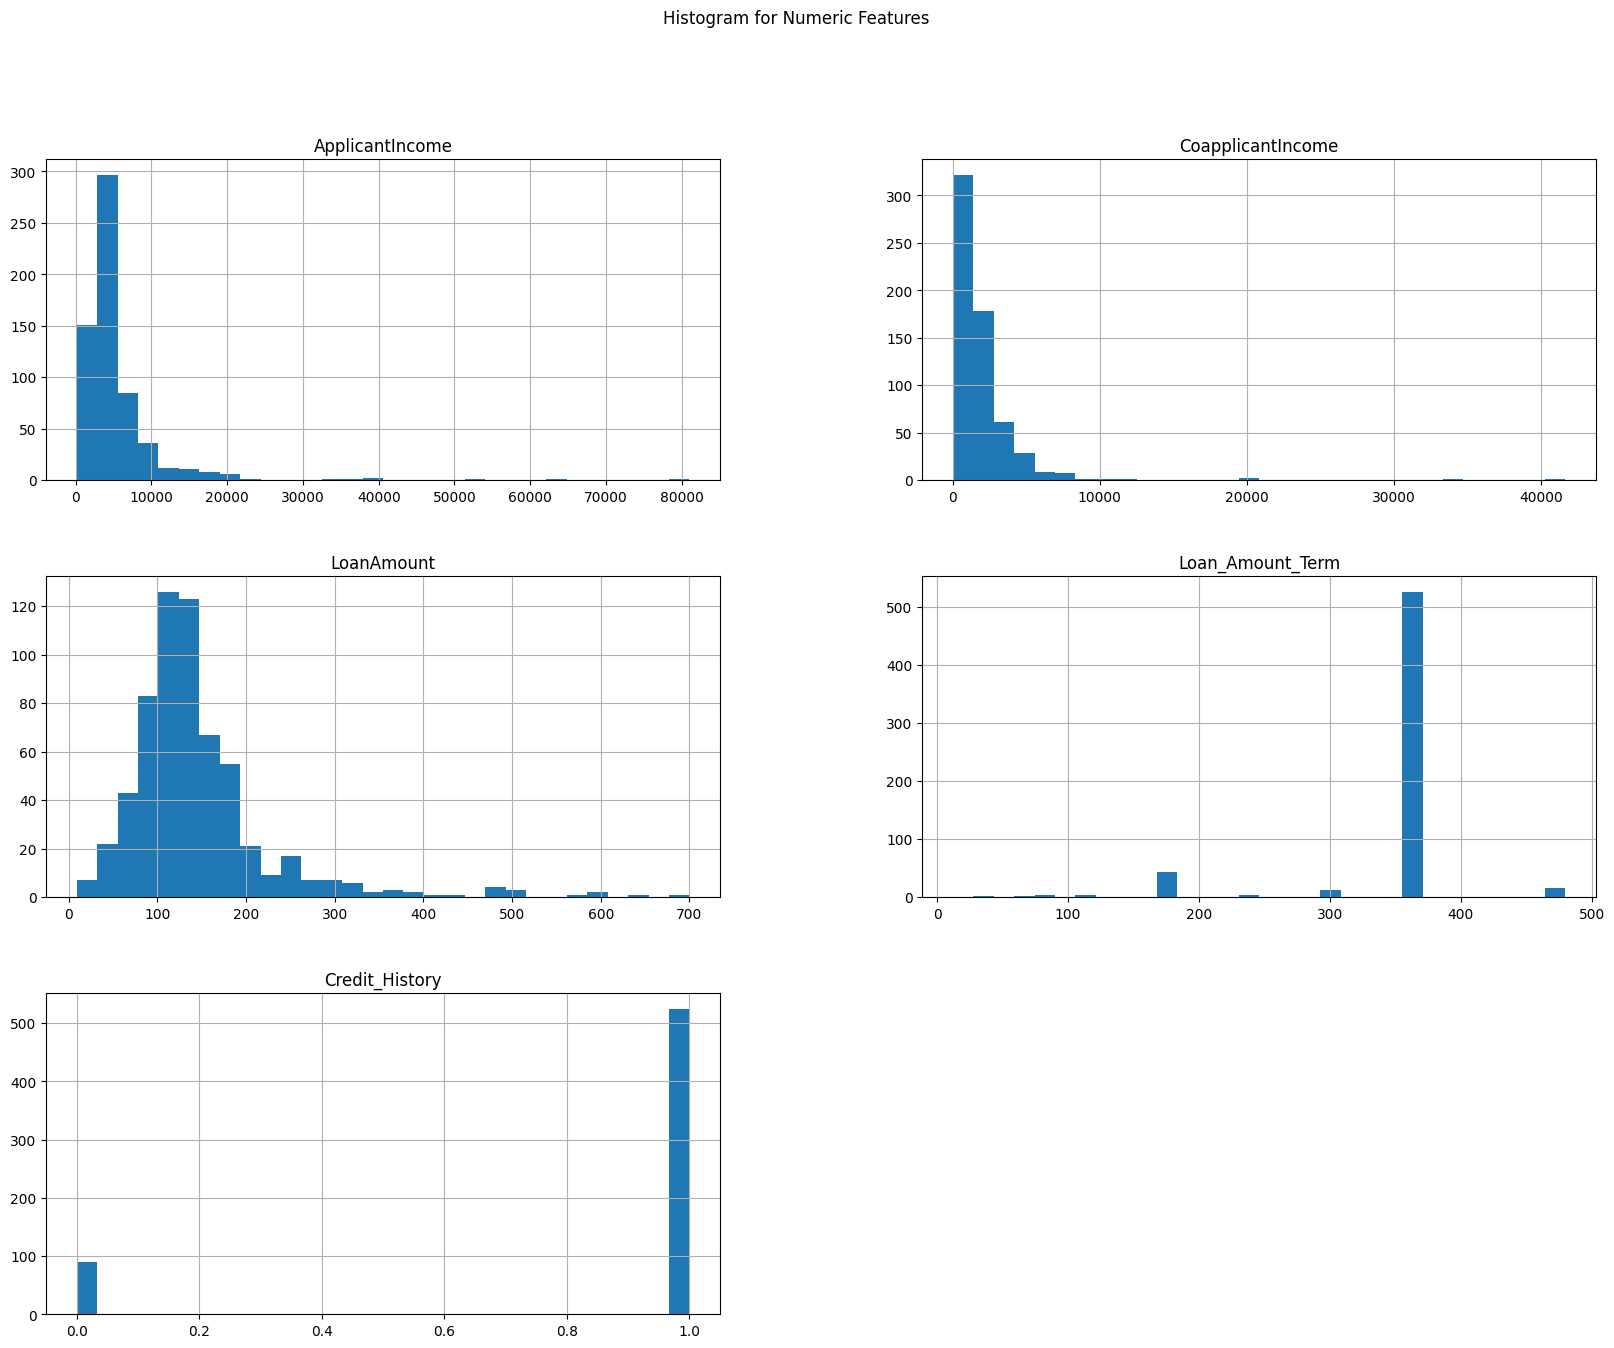

In [15]:
import pandas as pd

# Load the dataset
train_df = pd.read_csv('train_1.csv')

# Handle missing values
train_df['Gender'].fillna(train_df['Gender'].mode()[0], inplace=True)
train_df['Married'].fillna(train_df['Married'].mode()[0], inplace=True)
train_df['Dependents'].fillna(train_df['Dependents'].mode()[0], inplace=True)
train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0], inplace=True)
train_df['LoanAmount'].fillna(train_df['LoanAmount'].median(), inplace=True)
train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mode()[0], inplace=True)
train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0], inplace=True)


import matplotlib.pyplot as plt

# Plot histogram for numeric features
train_df.hist(bins=30, figsize=(20, 15))
plt.suptitle('Histogram for Numeric Features')
plt.show()


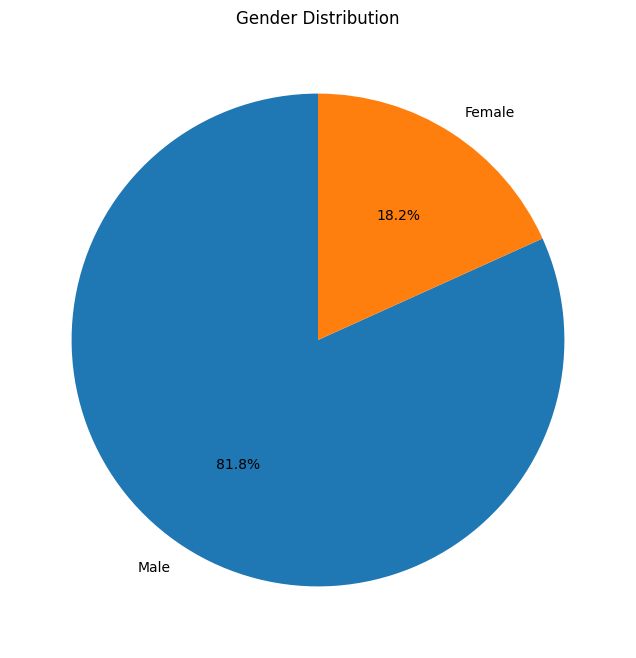

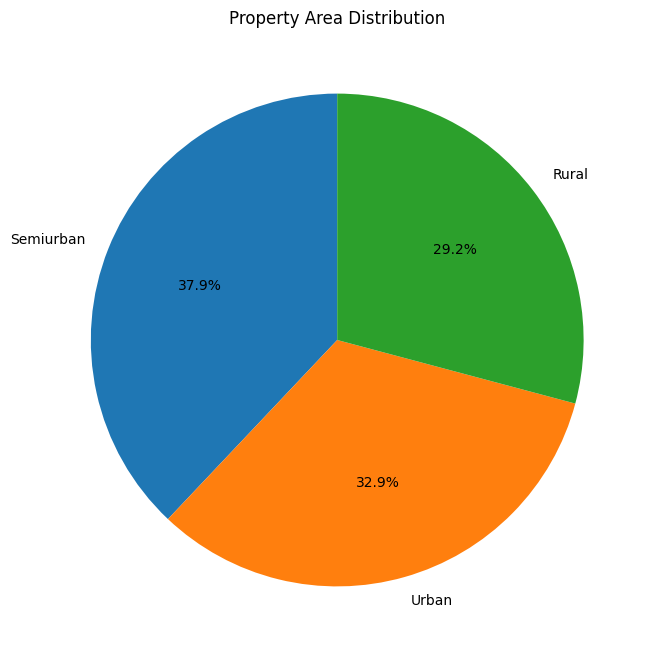

In [17]:
# Plot pie chart for categorical features

# Gender
train_df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8, 8))
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

# Property Area
train_df['Property_Area'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8, 8))
plt.title('Property Area Distribution')
plt.ylabel('')
plt.show()



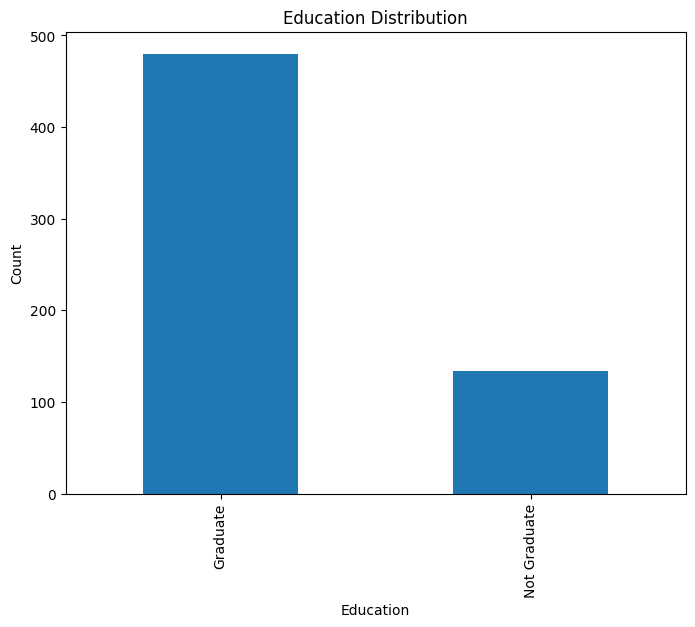

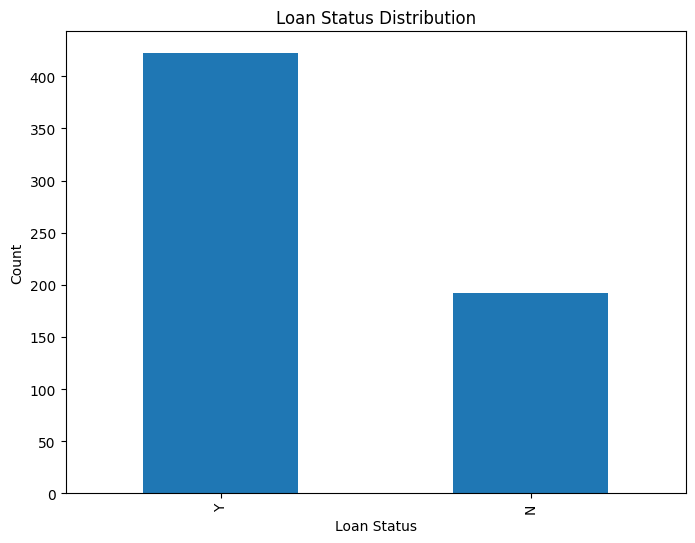

In [18]:
# Plot bar chart for categorical features

# Education
train_df['Education'].value_counts().plot(kind='bar', figsize=(8, 6))
plt.title('Education Distribution')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

# Loan Status
train_df['Loan_Status'].value_counts().plot(kind='bar', figsize=(8, 6))
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()


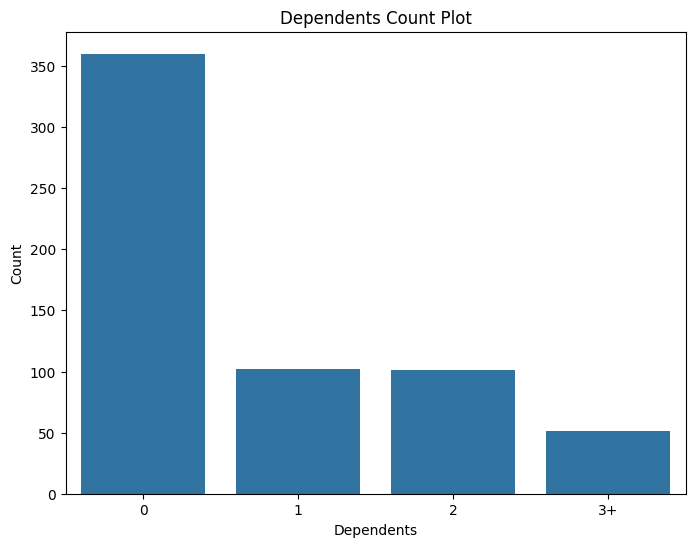

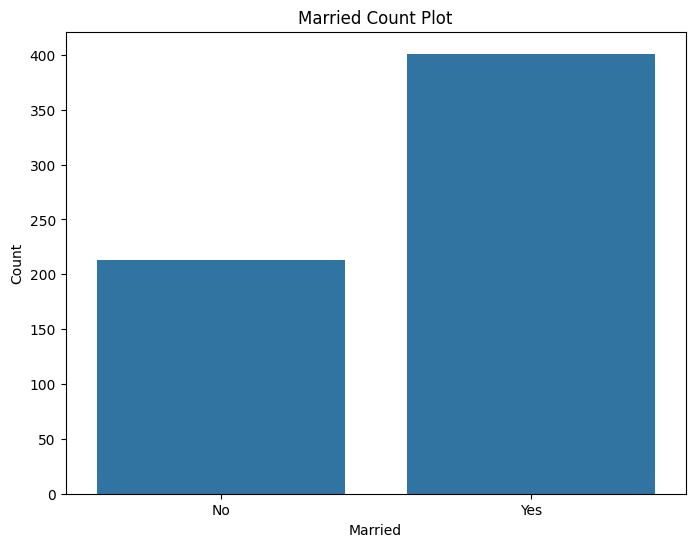

In [19]:
import seaborn as sns

# Plot count plot for categorical features

# Dependents
plt.figure(figsize=(8, 6))
sns.countplot(x='Dependents', data=train_df)
plt.title('Dependents Count Plot')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.show()

# Married
plt.figure(figsize=(8, 6))
sns.countplot(x='Married', data=train_df)
plt.title('Married Count Plot')
plt.xlabel('Married')
plt.ylabel('Count')
plt.show()
